In [1]:
import numpy as np
import matplotlib.pyplot as plt
from generate_field import *
from matplotlib import cm, colors
import os
import imageio

In [2]:
dir = '/home/zyou6474/tasks/channel_flow/outputs'
timestep = np.linspace(0, 1000, 5)
domain = [2*np.pi, np.pi, 1]
dims = [128, 128, 64]

theta_f = dir + '/outputs/theta.01.%.8i'
u_f = dir + '/outputs/baseflow/u_base.%.8i'
v_f = dir + '/outputs/baseflow/v_base.%.8i'
w_f = dir + '/outputs/baseflow/w_base.%.8i'

In [3]:
# Generate the coordinates
x_coords, y_coords, z_coords = xyz(domain, dims)

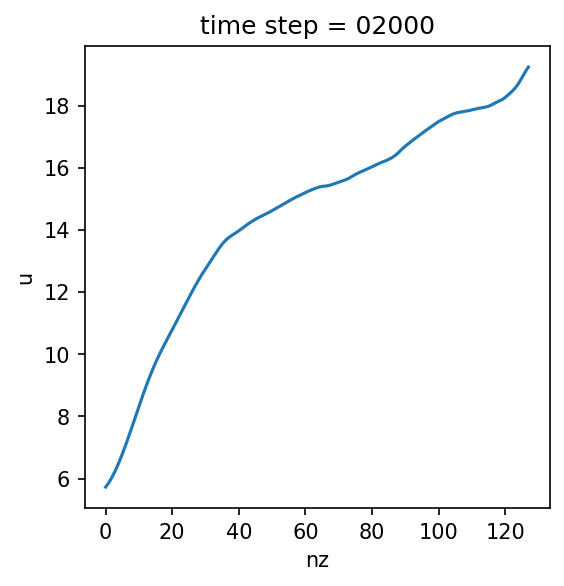

In [9]:
t = 2000
# ic_f = '/home/ext-zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/inputs/turbulence_128_128_64/u_velocity.IC'
u = read_array_from_file(u_f % t, dims)
# u = read_array_from_file(ic_f, [128, 128, 64])



fig, ax = plt.subplots(figsize=(4,4), dpi=150)
ax.plot(np.mean(u[:, 10, :], axis=0))
ax.set_title('time step = %.5i' %t)
ax.set_ylabel('u')
ax.set_xlabel('nz')
fig.show()

## Plot the setup of the source and sensor

/tmp/ipykernel_22732/2538088906.py:8: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_coords, y_coords, theta[:, :, 64].T, levs, norm=colors.LogNorm(), cmap=cm.binary)


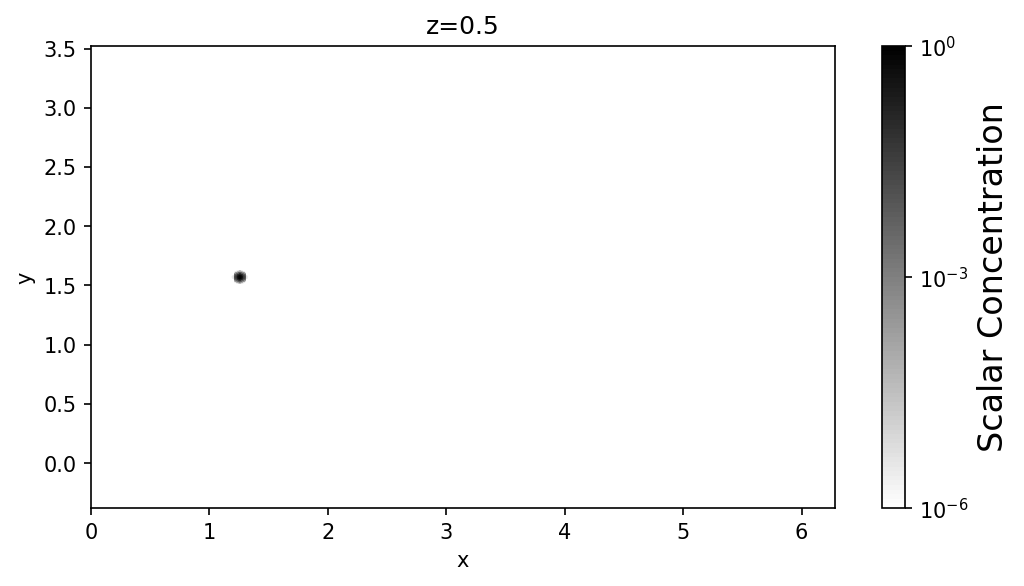

In [5]:
theta = read_array_from_file(theta_f % t, dims)
# theta[theta<theta.max()*0.01]=0
levs = 10**np.linspace(-6, 0, 101)

# theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
cs = ax.contourf(x_coords, y_coords, theta[:, :, 64].T, levs, norm=colors.LogNorm(), cmap=cm.binary)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('equal')

ax.set_ylim(bottom=0)

cbar = fig.colorbar(cs)
cbar.set_ticks(levs[::50])
cbar.set_label(r'Scalar Concentration', size=16)

ax.set_title('z=0.5')
fig.show()

In [6]:
def contourf_t(f, t, dims, z=64):

    theta = read_array_from_file(f % t, dims)
    # theta[theta<theta.max()*0.01]=0
    levs = 10**np.linspace(-6, 0, 101)

    # theta[theta<0.1*theta.max()] = 0

    fig, ax = plt.subplots(figsize=(8,4), dpi=150)
    cs = ax.contourf(x_coords, y_coords, theta[:, :, z].T, levs, norm=colors.LogNorm(), cmap=cm.binary)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis('equal')

    ax.set_ylim(bottom=0)

    cbar = fig.colorbar(cs)
    cbar.set_ticks(levs[::50])
    cbar.set_label(r'Scalar Concentration', size=16)

    ax.set_title('z=0.5')
    # fig.show()
    return fig

In [7]:
filenames = []
for i in timestep:
    fig = contourf_t(theta_f, i, dims)
    
    # create file name and append it to a list
    filename = dir + f'/outputs/%.5i.png' % i
    filenames.append(filename)
    
    # save frame
    fig.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer(dir + '/outputs/mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

/tmp/ipykernel_22732/955007618.py:10: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_coords, y_coords, theta[:, :, z].T, levs, norm=colors.LogNorm(), cmap=cm.binary)
/tmp/ipykernel_22732/1470642810.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
